# Jupyter Notebooks

## Major features
* Online environment for running snippets
* Combine hypertext, code and charts on the same page
* Perfect for sharing snippets for teach something to others.
* Don't need to have a local environment with all the languages and libs
 
## Language support

Multiple languages are supported through the concept of kernels: interpreters that execute tiny scripts one by one, on demand, while maintaining a runtime environment. Basically a REPL that's called from the web UI. The list currently includes:
* Python
* R
* F# (on Azure Notebooks)a
* Julia/Scala/etc.

## Data Science / Machine Learning

Python and R are also popular for data science and machine learning, so people made sure they integrate well with Jupyter Notebooks. This means that many objects render nicely on the Notebook UI:

* Pandas DataFrames are rendered as tables
* matplotlib charts are rendered as inline pictures

# Scientific Python

For machine learning, 3 types of libraries always pop up:
* Data Analysis: These are libraries that can load data from various sources, do various transformations, and compute basic statistics. Best Python example: [Pandas](http://pandas.pydata.org/)
* Machine Learning: These libraries implement machine learning algorithms. Best Python example: [scikit-learn](http://scikit-learn.org/)
* Charting: Render various graphs and plots of our data. Best Python example: [matplotlib](http://matplotlib.org/)



# Example 1: Titanic dataset

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# Make charts a bit prettier
plt.style.use('ggplot')

In [43]:
titanic = pd.read_csv('titanic.csv', sep = ',')

In [44]:
# What are the dimensions
titanic.shape

(891, 12)

In [45]:
# What are the column names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
titanic['MySum'] = titanic["Survived"] + titanic["Pclass"]

In [47]:
# What do the first few rows look like
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MySum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [48]:
# Let's x cleanup the data a bit
city_names =  {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"} 
titanic["EmbarkedCode"] = titanic["Embarked"]
titanic["Embarked"] = titanic["EmbarkedCode"].apply(lambda value: city_names.get(value)) 

In [49]:
# Check if it worked
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MySum,EmbarkedCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,3,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,4,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,3,S


In [50]:
#Tell matplotlib to render graphs inside this notebook
%matplotlib inline

In [53]:
# Let's create a contingency table
pd.crosstab(titanic.Pclass, titanic.Survived, margins = True) 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [30]:
# Let's do the same but as percentages
pd.crosstab(titanic.Pclass, titanic.Survived, margins = True).apply(lambda row: row/len(titanic))

Survived,0,1,All
Pclass,,,
1,0.089787,0.152637,0.242424
2,0.108866,0.097643,0.206510
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1.000000


In [57]:
titanic.groupby(["Sex", "Survived"]).count().unstack("Survived")["PassengerId"]

Survived,0,1
Sex,,
female,81,233
male,468,109


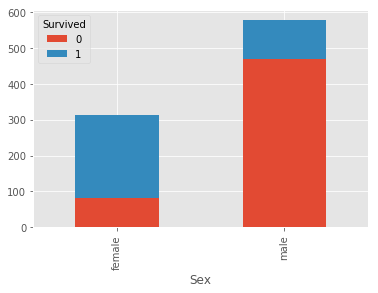

In [31]:
# Let's create a stacked bar chart for sex vs. survivability 
titanic.groupby(["Sex", "Survived"]).count().unstack("Survived")["PassengerId"].plot(kind="bar", stacked=True)


In [64]:
titanic[titanic.Sex == 'female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MySum,EmbarkedCode
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,4,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,2,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,Southampton,4,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,Cherbourg,3,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,Southampton,4,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,Southampton,2,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,Southampton,3,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,Southampton,3,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,Southampton,3,S


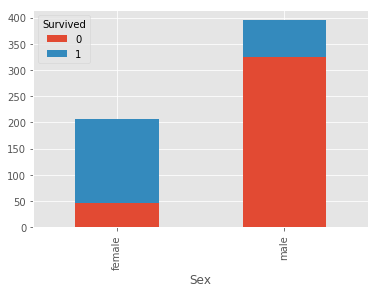

In [32]:
# Do the same graph, but only for people older than 18 years old
titanic[titanic.Age >= 18].groupby(["Sex", "Survived"]).count().unstack("Survived")["PassengerId"].plot(kind="bar", stacked=True)

# Example 2: Video Game Sales

In [33]:
games = pd.read_csv("videogames.csv", sep = ",")

In [34]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
by_publisher = games.groupby("Publisher").agg({"NA_Sales": sum, 
                                               "EU_Sales": sum, 
                                               "JP_Sales": sum, 
                                               "Global_Sales": sum, 
                                               "Critic_Score": np.mean}) 
by_publisher["Nintendo"]

KeyError: 'Nintendo'

In [69]:
by_publisher.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Critic_Score'], dtype='object')

In [36]:
top_publishers = by_publisher.sort_values("Global_Sales", ascending = False)[0:15][["NA_Sales", "EU_Sales", "JP_Sales"]]
top_publishers

,NA_Sales,EU_Sales,JP_Sales
Publisher,,,
Nintendo,816.97,419.01,458.15
Electronic Arts,599.50,373.91,14.35
Activision,432.59,215.90,6.71
Sony Computer Entertainment,266.17,186.56,74.15
Ubisoft,252.74,161.99,7.52
Take-Two Interactive,222.94,119.25,5.93
THQ,207.72,93.78,5.01
Konami Digital Entertainment,91.90,68.98,91.40
Sega,108.61,80.66,57.06


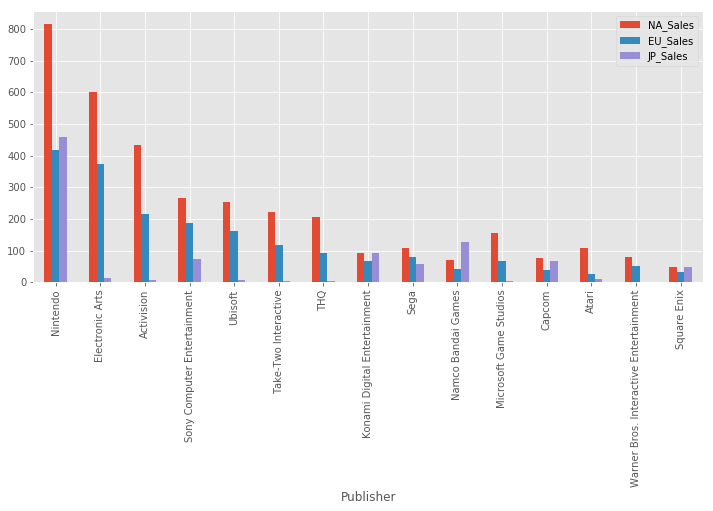

In [37]:
top_publishers.plot(kind="bar", figsize=(12,5))

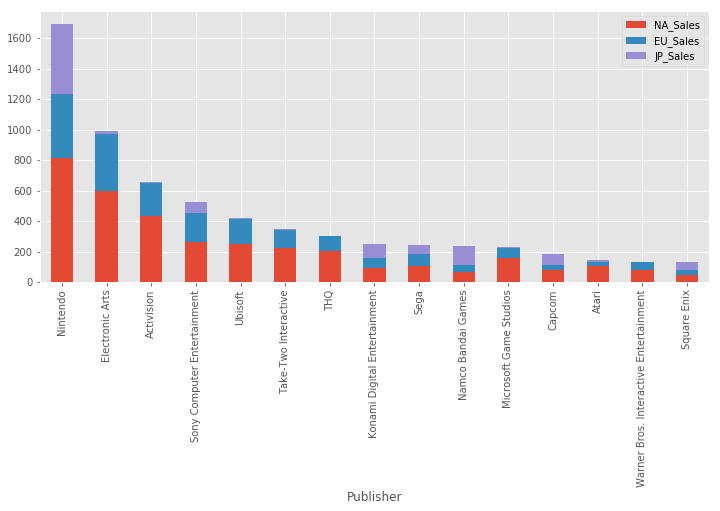

In [38]:
# And again, as a barplot
top_publishers.plot(kind="bar", stacked = True, figsize=(12,5))

# Running Jupyter Notebooks locally with Docker

## Install Docker, either natively or with docker machine

If running Linux, MacOS or Windows 10, you can get Docker native at [docker.com](https://www.docker.com/products/docker).

If you're running Windows 8 then you need [Docker Toolbox](https://www.docker.com/products/docker-toolbox)

## Open a docker console to verify that docker is running

Open Docker Quickstart Terminal and run the following: 

```
$ docker ps
CONTAINER ID        IMAGE           COMMAND          CREATED          STATUS           PORTS            NAMES
```

You're probably seeing an empty list. This is ok, docker is running, you just don't have any container running.


## Choose an image from the Jupyter official Docker
1. Go here: https://hub.docker.com/u/jupyter/
2. Pick one of the images named *-notebook. For example, for python+scikit-learn+matplotlib, pick jupyter/scipy-notebook

## Create a new container

```
$ docker run -p 8888:8888 -v /home/jovyan/work --name jupyternb jupyter/scipy-notebook start-notebook.sh --NotebookApp.token=''
```

A bit about what this does:

* `docker run` is used to run a new container
* `-p 8888:8888` tells docker to map the port 8888 from the container to the host machine (or docker-machine vm)
* `-v /home/jovyan/work` tells docker to create a persistent volume for the directory where the notebooks are stored. Without this, all work will be lost when stopping the docker container.
* `--name jupyternb` specifies the name of the container. Without it, docker will generate a random name
* `jupyter/scipy-notebook` is the name of the image from the docker hub to run
* `start-notebook.sh --NotebookApp.token=''`: totally optional, but this is specific to the Jupyter Notebook Docker image and tells it to disable authentication. Otherwise, you would have to get the initial configuration token from the docker logs.

## Accessing the container

If using docker native, the app will be available at http://localhost:8888. 

If using docker-machine, you'll need to find out its IP first using `docker-machine inspect default | grep IPAddress`, usually 192.168.99.100. The app will be avaialble then at e.g. http://192.168.99.100:8888.

## Starting the container

If the container is stopped (e.g after reboot), it can be started with:

```
$ docker start jupyternb
```

## Good Luck!

You should now be able to upload or create notebooks, as well as datasets that can be loaded from the notebooks.

**Note**: All work will be persisted to the docker volume, but you are encouraged to keep your files separately anwyay. They can be downloaded by choosing File > Download as > Notebook from the menu.